In [1]:
!nvidia-smi

Tue May 31 00:58:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# !unzip -q "/content/drive/MyDrive/NLP/AI4Code/dataset/AI4Code.zip" -d "/content/dataset"

# Dataset and Dependencies

## Import the necessary libraries

In [4]:
# general dependencies
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords
import wordcloud

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [5]:
sns.set(style="whitegrid", palette="muted")
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Read and save full Dataframe

In [6]:
def read_notebook(path):
    return (pd.read_json(path, dtype={'cell_type': 'category', 'source': 'str'}).assign(id=path.stem).rename_axis('cell_id'))

In [7]:
# # Reading train dataframe
# data_dir = Path("/content/dataset")


# paths_train = list((data_dir / 'train').glob('*.json'))
# notebooks_train = [read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')]
# df = pd.concat(notebooks_train).set_index('id', append=True).swaplevel().sort_index(level='id', sort_remaining=False)

In [8]:
# df.head()

In [9]:
# df_orders = pd.read_csv(
#     data_dir / 'train_orders.csv',
#     index_col = 'id',
#     squeeze=True
# ).str.split()

In [10]:
def get_ranks(base, derived):
    return [base.index(d) for d in derived]

In [11]:
# df_orders_ = df_orders.to_frame().join(
#     df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
#     how='right'
# )

# ranks = {}
# for id_, cell_order, cell_id in df_orders_.itertuples():
#     ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

# df_ranks = pd.DataFrame.from_dict(ranks, orient='index').rename_axis('id').apply(pd.Series.explode).set_index('cell_id', append=True)

# df_ranks

In [12]:
# df_ancestors = pd.read_csv(data_dir / 'train_ancestors.csv', index_col='id')
# df_ancestors

In [13]:
# df = df.reset_index().merge(df_ranks, on=['id', 'cell_id']).merge(df_ancestors, on=['id'])

In [14]:
# df["pct_rank"] = df['rank'] / df.groupby("id")["cell_id"].transform("count")
# df['pct_rank'].hist(bins=10)

In [15]:
# df.head()

In [16]:
# df.to_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/EDA/raw_train_dataset.pkl')

# General EDA

## Overview of the data

In [17]:
df = pd.read_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/EDA/raw_train_dataset.pkl')
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,00001756c60be8,1862f0a6,code,# This Python 3 environment comes with many he...,0,945aea18,NaN,0.0
1,00001756c60be8,2a9e43d6,code,import numpy as np\nimport pandas as pd\nimpor...,2,945aea18,NaN,0.034483
2,00001756c60be8,038b763d,code,import warnings\nwarnings.filterwarnings('igno...,4,945aea18,NaN,0.068966
3,00001756c60be8,2eefe0ef,code,matplotlib.rcParams.update({'font.size': 14}),6,945aea18,NaN,0.103448
4,00001756c60be8,0beab1cd,code,"def evaluate_preds(train_true_values, train_pr...",8,945aea18,NaN,0.137931
...,...,...,...,...,...,...,...,...
6370641,fffe1d764579d5,0d770d6b,markdown,## REMOVING THE OUTLIERS,43,3c40bfa6,NaN,0.597222
6370642,fffe1d764579d5,d45ddc62,markdown,### DIMENSIONALITY CURSE,33,3c40bfa6,NaN,0.458333
6370643,fffe1d764579d5,1a63248d,markdown,# BANGALORE HOUSE PRICE PREDICTION,0,3c40bfa6,NaN,0.0
6370644,fffe1d764579d5,a8ffc8b4,markdown,* We have achieved 75.2% accuracy in predictin...,69,3c40bfa6,NaN,0.958333


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370646 entries, 0 to 6370645
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   cell_id      object
 2   cell_type    object
 3   source       object
 4   rank         object
 5   ancestor_id  object
 6   parent_id    object
 7   pct_rank     object
dtypes: object(8)
memory usage: 437.4+ MB


In [19]:
df.nunique()

id              139256
cell_id        6365854
cell_type            2
source         4860715
rank              1005
ancestor_id     125372
parent_id        13630
pct_rank         71988
dtype: int64

## Missing values

In [20]:
df.isna().sum()

id                   0
cell_id              0
cell_type            0
source               0
rank                 0
ancestor_id          0
parent_id      5543070
pct_rank             0
dtype: int64

# Detailed Analysis

## Distribution of cell type column

In [21]:
df['cell_type'].value_counts()

code        4204582
markdown    2166064
Name: cell_type, dtype: int64

4204582 of 6370646 records are codes it is the 66.00% of the training set.
2166064 of 6370646 records are markdowns and it is the 34.00% of the training set.


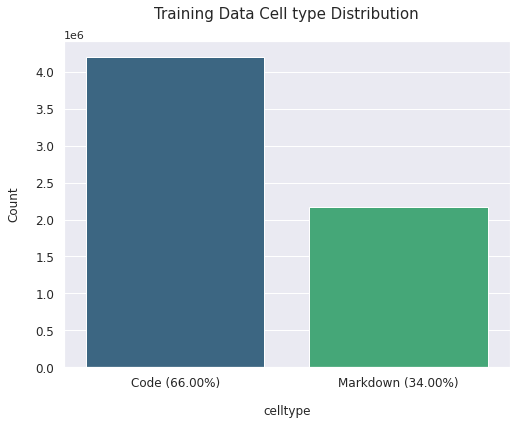

In [22]:
#Checking the distribution of cell type variable

celltype1 = df['cell_type'].value_counts()['markdown']
celltype0 = df['cell_type'].value_counts()['code']
celltype1per = celltype1 / df.shape[0] * 100
celltype0per = celltype0 / df.shape[0] * 100

print('{} of {} records are codes it is the {:.2f}% of the training set.'.format(celltype0, df.shape[0], celltype0per))
print('{} of {} records are markdowns and it is the {:.2f}% of the training set.'.format(celltype1, df.shape[0], celltype1per))

plt.figure(figsize=(8,6))
sns.countplot(df['cell_type'], palette = 'viridis', order = sorted(df['cell_type'].unique()))

plt.xlabel('celltype', size=12, labelpad=15)
plt.ylabel('Count', size=12, labelpad=15)
plt.xticks((0, 1), ['Code ({0:.2f}%)'.format(celltype0per), 'Markdown ({0:.2f}%)'.format(celltype1per)])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.title('Training Data Cell type Distribution', size=15, y=1.05)
plt.show()

## An example of each cell type

In [23]:
# Code
print("Code :\n",df[df['cell_type']=='code']['source'].values[42])
print("*"*40)
# Markdown
print("\nMarkdown :\n",df[df['cell_type']=='markdown']['source'].values[42])

Code :
 def mask2rgba(mask):
    rgba_list = []
    for idx in range(4):
        rgba = cv2.cvtColor(mask[:, :, idx], cv2.COLOR_GRAY2RGBA)
        rgba[:, :, 3] = rgba[:,:,0] * 100
        rgba[:, :, :3] = rgba[:, :, :3] * palet[idx]
        rgba_list.append(rgba)
    return rgba_list
****************************************

Markdown :
 ## Note : This Kernel is a Fork from the amazing Kernel below . So please upvote the original Kernel . I have started adding few information and preprocessing into this on my own . 
https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda


# Text data preprocessing

## Clean code and markdown texts

In [24]:
import os
import re
import nltk
from pathlib import Path
from tqdm.notebook import tqdm 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


def preprocess_markdown(text):
    # Converting to lowercase
    text = text.lower()

    # Remove text in square brackets
    # text = re.sub('\[.*?\]', '', text)

    # Remove link
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Remove all the special characters
    # text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove words containing numbers
    text = re.sub('\w*\d+\w*', '', text)

    # Remove text on htlm tag
    text = re.sub('<.*?>+', ' ', text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove \n
    text = re.sub(r'\r', '', text)
    text = re.sub(r'\n+', '\n', text)
    text = re.sub(r'\n', '. ', text)

    # Substrituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Remove not word at the begining and the end
    text = re.sub(r'(^\W+|\W+$)', '', text)

    # Lemmatization
    # tokens = text.split()
    # tokens = [stemmer.lemmatize(word) for word in tokens]
    # tokens = [word for word in tokens if len(word) > 3]
    # preprocessed_text = ' '.join(tokens)

    return text


def preprocess_code(text):
    # Converting to lowercase
    text = text.lower()

    # Remove link
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Substrituting multiple tab with single space
    text = re.sub(r'\t+', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'[a-zA-Z]+\d+[a-zA-Z]+', '', text)

    # Remove punctuation
    # text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

    # Remove all single characters
    # text = re.sub(r'(\s+[a-zA-Z]\s+|^[a-zA-Z]\s+)', ' ', text)

    # Remove multiple #
    text = re.sub(r'#+', '#', text)

    # Remove \n
    text = text.replace('\r', '').replace('\n+', '\n').replace('\n', ' ')

    # Substrituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Remove not word at the begining and the end
    # text = re.sub(r'(^\W+|\W+$)', '', text)

    return text

def preprocess_df(df):
    """
    This function is for processing source of notebook
    returns preprocessed dataframe
    """
    df.loc[df['cell_type'] == 'markdown', 'source'] = df.loc[df['cell_type'] == 'markdown', 'source'].apply(preprocess_markdown)
    df.loc[df['cell_type'] == 'code', 'source'] = df.loc[df['cell_type'] == 'code', 'source'].apply(preprocess_code)
    return df

## Take samples

In [25]:
# df_sample = df.loc[:10000].copy()
# df_sample = preprocess_df(df_sample)

In [26]:
# for row in df_sample.loc[df_sample['cell_type'] == 'code'][:1000].itertuples():
#     # cid = row.cell_id
#     # raw_text = df.loc[df['cell_id'] == cid, 'source'].values[0]
#     # print(raw_text)
#     # print(">>>>>>>>>>>>>>>>>>>" + row.source)
#     print(row.source)
#     print('---'*50)
#     # break

## Preprocess

In [27]:
# df = preprocess_df(df)
# df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,00001756c60be8,1862f0a6,code,# this python 3 environment comes with many he...,0,945aea18,NaN,0.0
1,00001756c60be8,2a9e43d6,code,import numpy as np import pandas as pd import ...,2,945aea18,NaN,0.034483
2,00001756c60be8,038b763d,code,import warnings warnings.filterwarnings('ignore'),4,945aea18,NaN,0.068966
3,00001756c60be8,2eefe0ef,code,matplotlib.rcparams.update({'font.size': 14}),6,945aea18,NaN,0.103448
4,00001756c60be8,0beab1cd,code,"def evaluate_preds(train_true_values, train_pr...",8,945aea18,NaN,0.137931
...,...,...,...,...,...,...,...,...
6370641,fffe1d764579d5,0d770d6b,markdown,removing the outliers,43,3c40bfa6,NaN,0.597222
6370642,fffe1d764579d5,d45ddc62,markdown,dimensionality curse,33,3c40bfa6,NaN,0.458333
6370643,fffe1d764579d5,1a63248d,markdown,bangalore house price prediction,0,3c40bfa6,NaN,0.0
6370644,fffe1d764579d5,a8ffc8b4,markdown,we have achieved accuracy in predicting the pr...,69,3c40bfa6,NaN,0.958333


## Save clean dataset

In [29]:
# df.to_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/exp_5/clean_dataset.pkl')

## Train Test Split

In [30]:
# from sklearn.model_selection import GroupShuffleSplit

# splitter = GroupShuffleSplit(n_splits=1, test_size=0.05, random_state=42)

# train_ind, val_ind = next(splitter.split(df, groups=df["ancestor_id"]))

# train_df = df.loc[train_ind].reset_index(drop=True)
# val_df = df.loc[val_ind].reset_index(drop=True)

In [31]:
# train_df.to_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/exp_5/clean_train_dataset.pkl')
# val_df.to_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/exp_5/clean_val_dataset.pkl')

# Text statistics

In [32]:
df = pd.read_pickle('/content/drive/MyDrive/NLP/AI4Code/dataset/exp_5/clean_train_dataset.pkl')
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,00001756c60be8,1862f0a6,code,# this python 3 environment comes with many he...,0,945aea18,NaN,0.0
1,00001756c60be8,2a9e43d6,code,import numpy as np import pandas as pd import ...,2,945aea18,NaN,0.034483
2,00001756c60be8,038b763d,code,import warnings warnings.filterwarnings('ignore'),4,945aea18,NaN,0.068966
3,00001756c60be8,2eefe0ef,code,matplotlib.rcparams.update({'font.size': 14}),6,945aea18,NaN,0.103448
4,00001756c60be8,0beab1cd,code,"def evaluate_preds(train_true_values, train_pr...",8,945aea18,NaN,0.137931
...,...,...,...,...,...,...,...,...
6055708,fffe1d764579d5,0d770d6b,markdown,removing the outliers,43,3c40bfa6,NaN,0.597222
6055709,fffe1d764579d5,d45ddc62,markdown,dimensionality curse,33,3c40bfa6,NaN,0.458333
6055710,fffe1d764579d5,1a63248d,markdown,bangalore house price prediction,0,3c40bfa6,NaN,0.0
6055711,fffe1d764579d5,a8ffc8b4,markdown,we have achieved accuracy in predicting the pr...,69,3c40bfa6,NaN,0.958333


In [33]:
#Performing the below analysis only on a sample to save memory
num_sample = 100000
df = df.sample(num_sample, random_state = 42)

In [34]:
df['text_len'] = df['source'].astype(str).apply(len)
df['text_word_count'] = df['source'].apply(lambda x: len(str(x).split()))

In [35]:
markdowns = df[df['cell_type'] == 'markdown']
codes = df[df['cell_type'] == 'code']

## Source length analysis

In [36]:
x = df['text_len'].value_counts()
df_sample = df[df['text_len'].isin(x[x>200].index)]

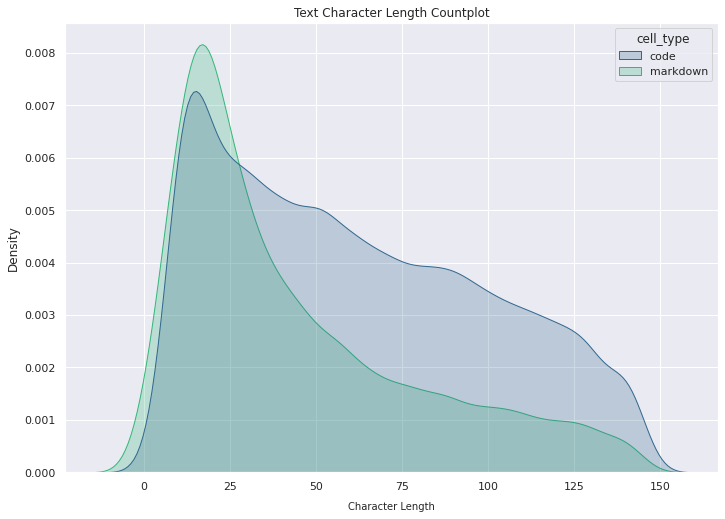

In [37]:
sns.kdeplot(data=df_sample, x="text_len", hue = 'cell_type', palette = 'viridis', shade = True)
plt.title('Text Character Length Countplot', size=12)
plt.xlabel('Character Length', size=10, labelpad=10)
plt.show()

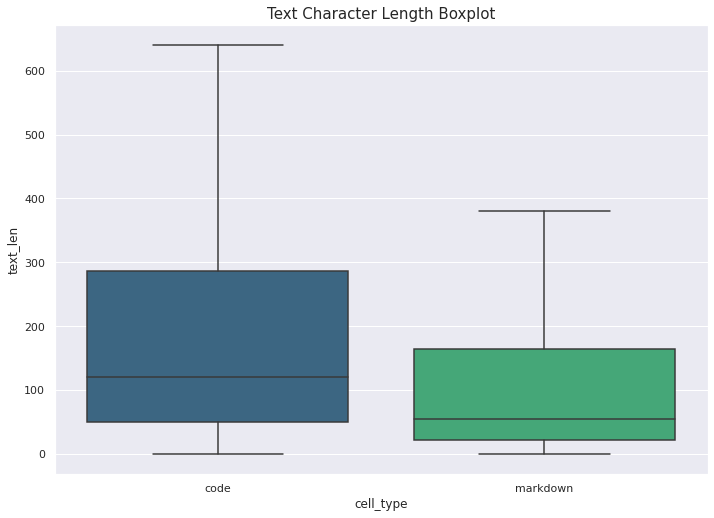

In [38]:
sns.boxplot(data=df,x = 'cell_type', y="text_len", palette = 'viridis', showfliers = False)
plt.title('Text Character Length Boxplot', size=15)
plt.show()

## Word Count Analysis

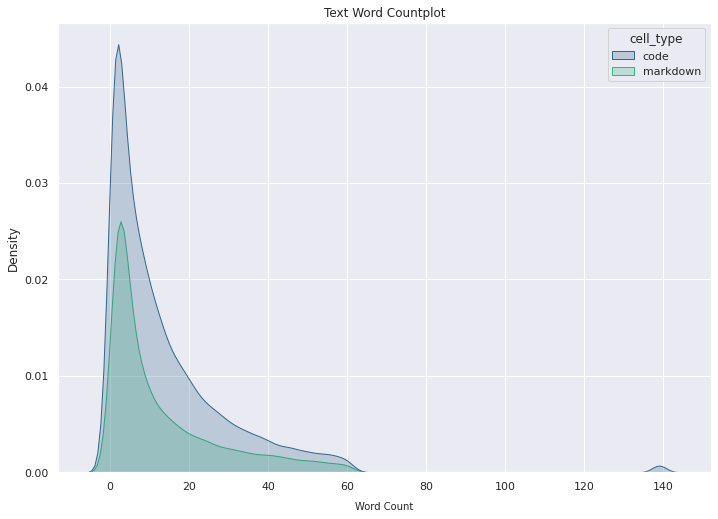

In [39]:
x = df['text_word_count'].value_counts()
df_sample = df[df['text_word_count'].isin(x[x>200].index)]

sns.kdeplot(data=df_sample, x="text_word_count", hue = 'cell_type', palette = 'viridis', shade = True)

plt.title('Text Word Countplot', size=12)
plt.xlabel('Word Count', size=10, labelpad=10)
plt.show()

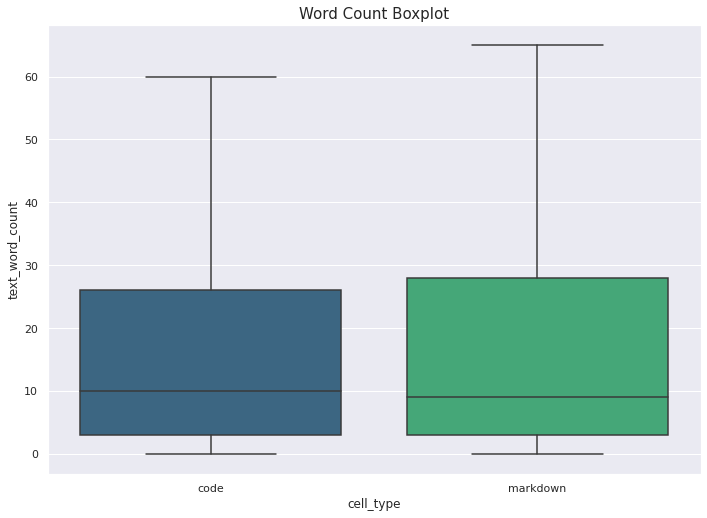

In [40]:
sns.boxplot(data=df,x = 'cell_type', y="text_word_count", palette = 'viridis', showfliers = False)
plt.title('Word Count Boxplot', size=15)
plt.show()

# Ngram Analysis

## Top 20 Unigrams in Code an Markdown Cells

In [41]:
#source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

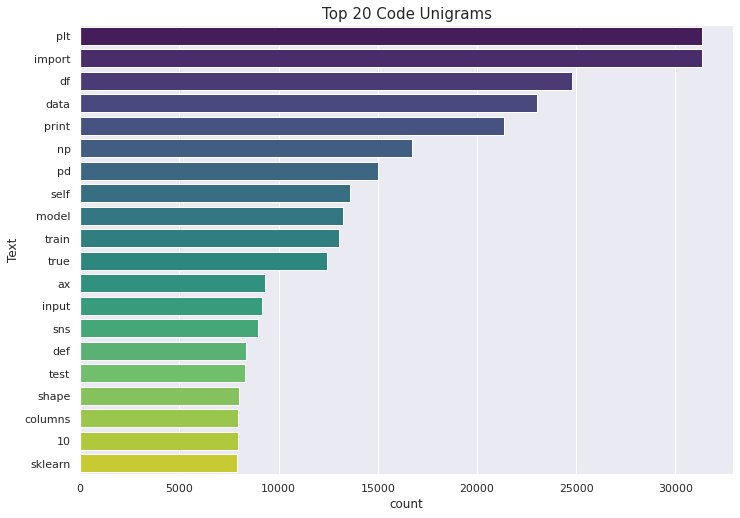

In [42]:
codes_unigrams = get_top_n_words(codes['source'],20)

df1 = pd.DataFrame(codes_unigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Unigrams', size=15)
plt.show()

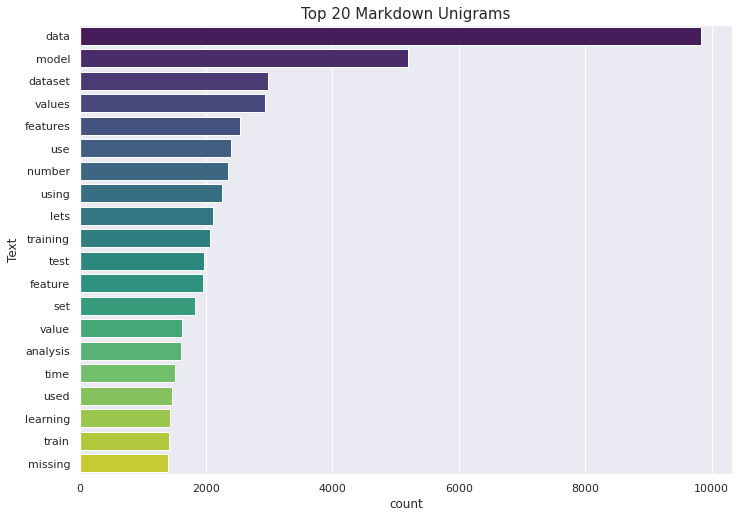

In [43]:
markdowns_unigrams = get_top_n_words(markdowns['source'],20)

df2 = pd.DataFrame(markdowns_unigrams, columns = ['Text' , 'count'])
df2 = df2.groupby('Text').sum()['count'].sort_values(ascending=False)
df2 = pd.DataFrame(df2).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df2, palette = 'viridis')
plt.title('Top 20 Markdown Unigrams', size=15)
plt.show()

## Top 20 Bigrams in Code and Markdown Cells

In [44]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

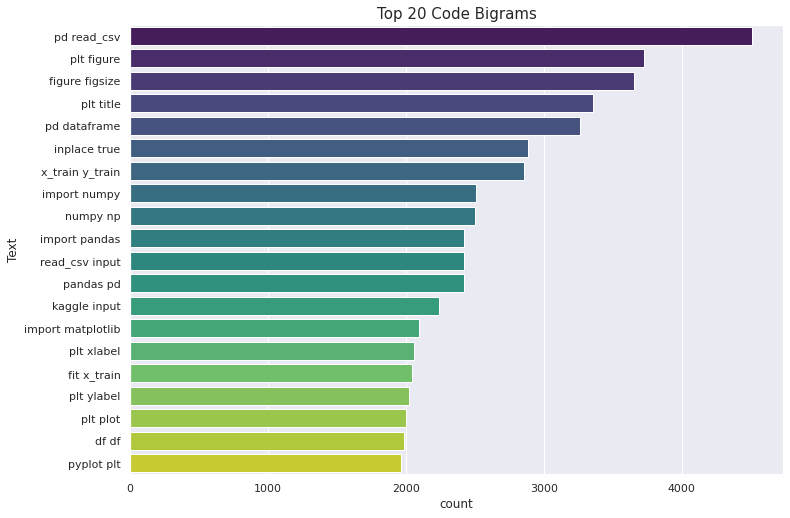

In [45]:
codes_bigrams = get_top_n_gram(codes['source'],(2,2),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Bigrams', size=15)
plt.show()

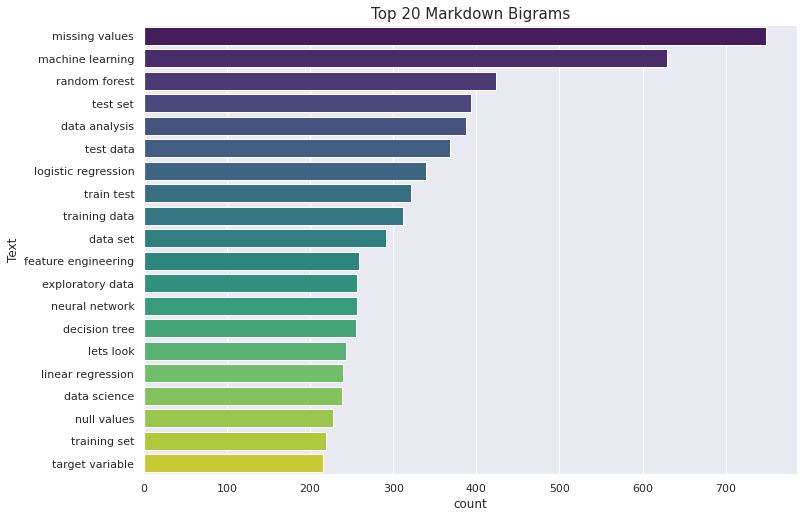

In [46]:
markdowns_bigrams = get_top_n_gram(markdowns['source'],(2,2),20)

#for word, freq in top_bigrams:
df2 = pd.DataFrame(markdowns_bigrams, columns = ['Text' , 'count'])
df2 = df2.groupby('Text').sum()['count'].sort_values(ascending=False)
df2 = pd.DataFrame(df2).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df2, palette = 'viridis')
plt.title('Top 20 Markdown Bigrams', size=15)
plt.show()

## Top 20 Trigrams in Code and Mardown Cells

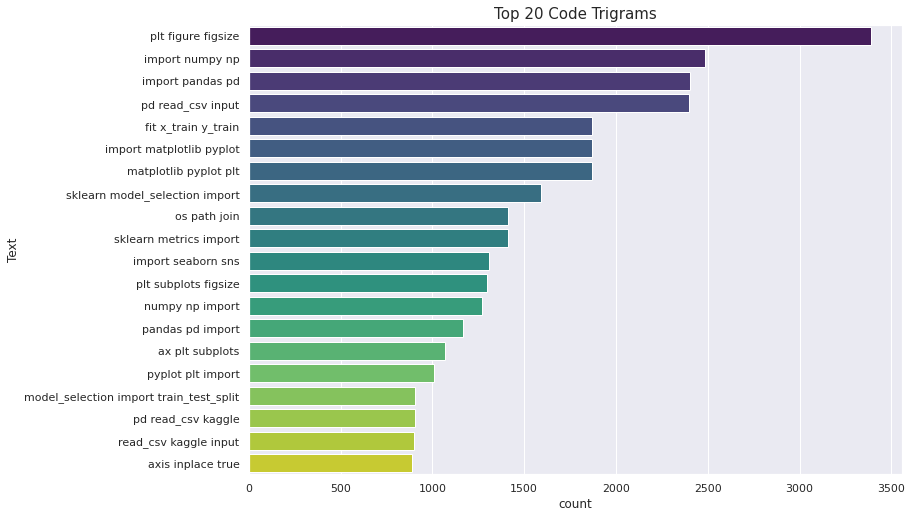

In [47]:
codes_bigrams = get_top_n_gram(codes['source'],(3,3),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Trigrams', size=15)
plt.show()

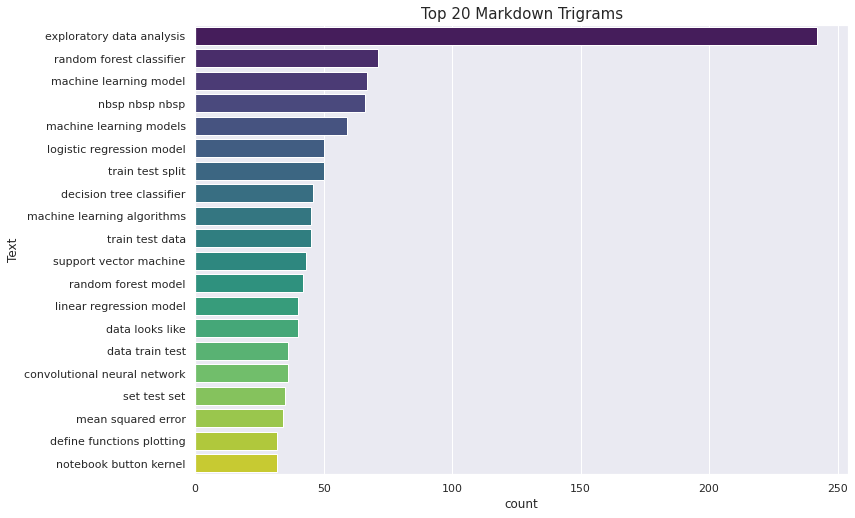

In [48]:
markdowns_bigrams = get_top_n_gram(markdowns['source'],(3,3),20)

#for word, freq in top_bigrams:
df2 = pd.DataFrame(markdowns_bigrams, columns = ['Text' , 'count'])
df2 = df2.groupby('Text').sum()['count'].sort_values(ascending=False)
df2 = pd.DataFrame(df2).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df2, palette = 'viridis')
plt.title('Top 20 Markdown Trigrams', size=15)
plt.show()

# Wordclouds

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000000,
        max_font_size=40, 
        scale=2,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Word Cloud for Codes


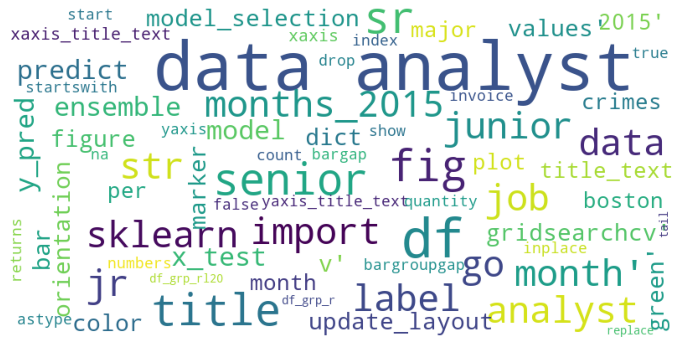


Word Cloud for Markdowns


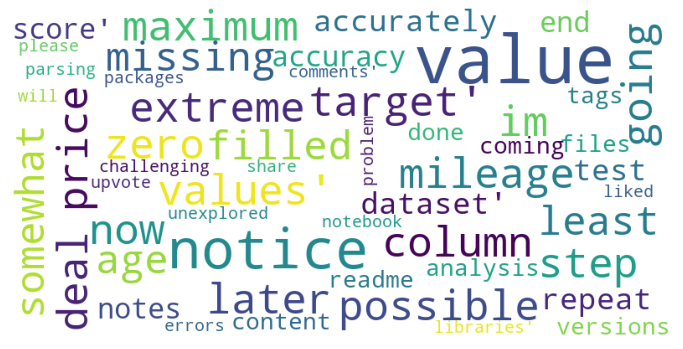

In [50]:
print("Word Cloud for Codes")
show_wordcloud(codes['source'].values)
print("\nWord Cloud for Markdowns")
show_wordcloud(markdowns['source'].values)